First import pandas

In [119]:
import pandas as pd

import matplotlib.pyplot as plt

In [120]:
#Load files

orders = pd.read_csv(r"C:\Users\Nelson\Downloads\Pizza-Place-Sales-1.csv")
order_details = pd.read_csv(r"C:\Users\Nelson\Downloads\Pizza-Place-Sales-2.csv")
pizzas = pd.read_csv(r"C:\Users\Nelson\Downloads\Pizza-Place-Sales-3.csv")
pizza_types = pd.read_csv(r"C:\Users\Nelson\Downloads\Pizza-Place-Sales-4.csv")

In [121]:
#combining 4 files into a data set using inner join because they have columns in common

df = orders.merge(order_details, on="order_id", how="inner")
df = df.merge(pizzas, on="pizza_id", how="inner")
df = df.merge(pizza_types, on="pizza_type_id", how="inner")

df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [122]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [124]:
df.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [125]:
df.shape

(48620, 12)

## Question 1

What is the Total Revenue/Sales

In [126]:
#to get the total Revenue.Sales it is Quantity * Price

df["revenue"] = df["quantity"] * df ["price"]

In [127]:
total_revenue = df["revenue"].sum()

total_revenue

np.float64(817860.0499999999)

## Question 2

Find the Total Quantity Sold

In [128]:
total_quantity_sold = df["quantity"].sum()

total_quantity_sold

np.int64(49574)

## Question 3

Find The Total Orders

In [129]:
#to get the total orders, we used total orders = number of unique order_id
#count cannot be used because it will get the numbers of rows because one order can contain multiple pizzas

total_orders = orders["order_id"].nunique()

total_orders

21350

## Question 4

How many pizza types do they sell

In [130]:
total_pizza_types = pizza_types["pizza_type_id"].nunique()

total_pizza_types

32

## Question 5

Find the average price of the pizzas

In [131]:
pizzas["price"].mean()

np.float64(16.440625)

## Question 6

What are the peak hours of sales

In [132]:
#using the time column

#convert time column to datetime

orders["time"] = pd.to_datetime(orders["time"])

C:\Users\Nelson\AppData\Local\Temp\ipykernel_11464\816436482.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["time"] = pd.to_datetime(orders["time"])


In [133]:
#Extract hour

orders["hour"] = orders["time"].dt.hour

In [134]:
#count orders per hour

orders_per_hour = orders.groupby("hour") ["order_id"].count()

orders_per_hour

hour
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
Name: order_id, dtype: int64

In [135]:
peak_hour = orders_per_hour.idxmax()

peak_hour

np.int32(12)

## Question 7

Find the total sales made on each day of the week. Which day of the week is when sales are made the most

In [136]:
df["revenue"] = df["quantity"] * df["price"]

In [137]:
#Convert date and Extract time

df["date"] = pd.to_datetime(df["date"])

df["day"] = df["date"].dt.day_name()

In [138]:
#calculate total sales per day

sales_per_day = df.groupby("day") ["revenue"].sum()

sales_per_day              

day
Friday       136073.90
Monday       107329.55
Saturday     123182.40
Sunday        99203.50
Thursday     123528.50
Tuesday      114133.80
Wednesday    114408.40
Name: revenue, dtype: float64

In [139]:
#Day with highest sales

best_day = sales_per_day.idxmax()

highest_sales = sales_per_day.max()

print(best_day, highest_sales)

Friday 136073.9


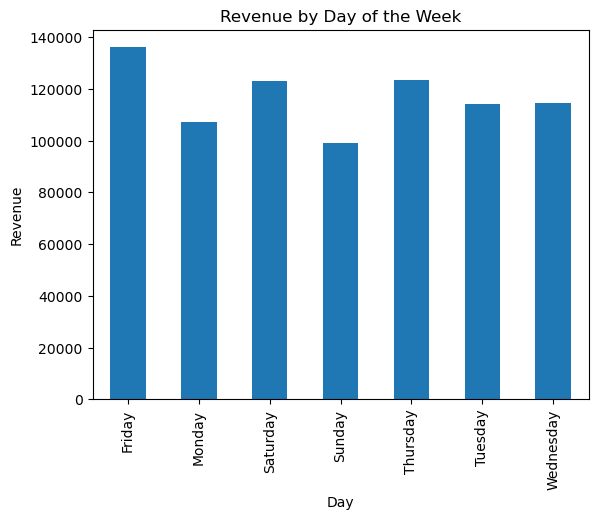

In [172]:
plt.figure()
sales_per_day.plot(kind="bar")
plt.title("Revenue by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

## Question 8

Find the top 5 bestselling pizzas

In [152]:
top_5_bestselling_pizzas = df.groupby("name") ["quantity"].sum().sort_values(ascending=False).head(5)

In [153]:
top_5_bestselling_pizzas

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

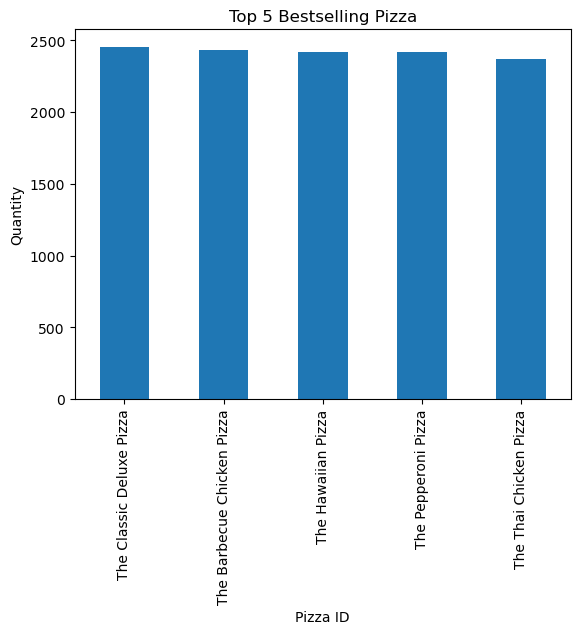

In [154]:
top_5_bestselling_pizzas.plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Top 5 Bestselling Pizza")
plt.xlabel("Pizza ID")
plt.ylabel("Quantity")
plt.show()

## Question 9

Find the sales made in each month. Any trend noticeable?

In [166]:
df["month"] = df["date"].dt.month_name()

In [168]:
monthly_sales = df.groupby("month")["revenue"].sum()

monthly_sales

month
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: revenue, dtype: float64

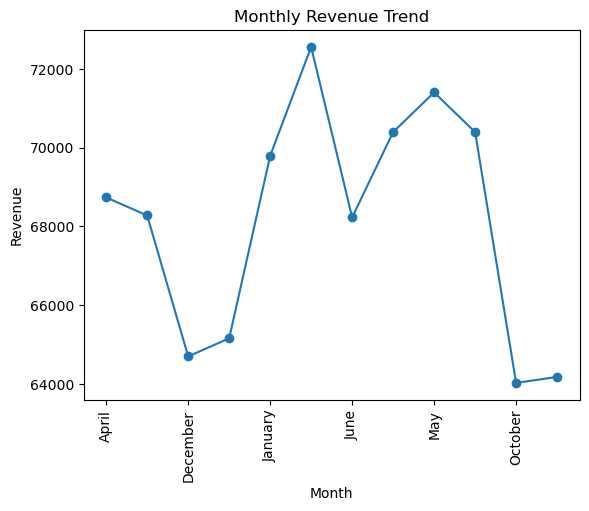

In [170]:
plt.figure()
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

## Noticeable trend

Peak Month is July
September and October (lowest dip)
Sales fluctuate month to month

Mid-year spike and Q3 dip

## Question 10

Are there pizza types that are not doing well on the menu?

In [177]:
worst_5_pizzas = df.groupby("name")["quantity"].sum().sort_values().head(5)

worst_5_pizzas

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

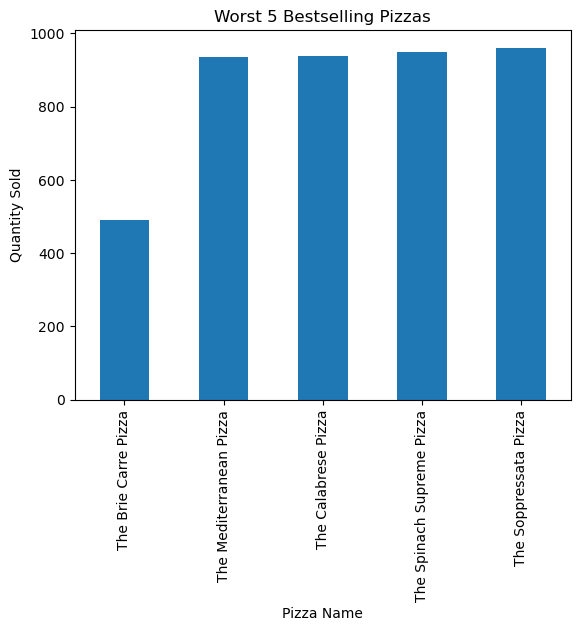

In [180]:
plt.figure()
worst_5_pizzas.plot(kind="bar")
plt.title("Worst 5 Bestselling Pizzas")
plt.xticks(rotation=90)
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")
plt.show()

In [181]:
df.to_csv("Worked_pizza_sales.csv", index=False)